In [1]:
import numpy as np

In [2]:
import torch

In [3]:
import torchvision

In [4]:
import matplotlib.pyplot as plt

In [5]:
from time import time

In [6]:
from torchvision import datasets, transforms

In [7]:
from torch import nn, optim

In [8]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [9]:
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download = True, 
train = False, transform = transform)

/home/al/.local/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [10]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download = True, 
train = True, transform = transform)

In [11]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                         shuffle=True)

In [12]:
valloader = torch.utils.data.DataLoader(valset, batch_size=64,
                                       shuffle=True)

In [13]:
dataiter = iter(trainloader)

In [14]:
images,  labels = dataiter.next()

In [15]:
print(images.shape)

torch.Size([64, 1, 28, 28])


In [16]:
print(labels.shape)

torch.Size([64])


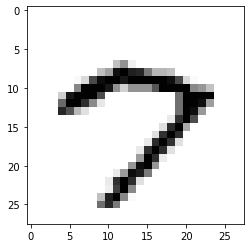

In [17]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

In [18]:
figure = plt.figure()

<Figure size 432x288 with 0 Axes>

In [19]:
num_of_images = 60

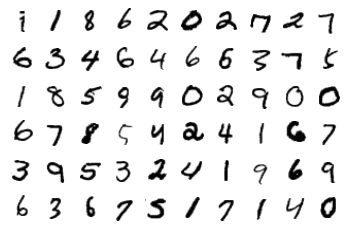

In [20]:
for index in range(1, num_of_images +1 ):
    plt.subplot(6,10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap = 'gray_r')

In [21]:
input_size = 784

In [22]:
hidden_sizes = [128, 64]

In [23]:
output_size = 10

In [24]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.LogSoftmax(dim=1))

In [25]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [26]:
criterion = nn.NLLLoss()

In [27]:
images, labels = next(iter(trainloader))

In [28]:
images = images.view(images.shape[0],-1)

In [29]:
print(images)

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])


In [30]:
logps = model(images)

In [31]:
loss = criterion(logps, labels)

In [32]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 4.8198e-05,  4.8198e-05,  4.8198e-05,  ...,  4.8198e-05,
          4.8198e-05,  4.8198e-05],
        [-2.7093e-03, -2.7093e-03, -2.7093e-03,  ..., -2.7093e-03,
         -2.7093e-03, -2.7093e-03],
        ...,
        [ 2.1676e-04,  2.1676e-04,  2.1676e-04,  ...,  2.1676e-04,
          2.1676e-04,  2.1676e-04],
        [ 1.6103e-03,  1.6103e-03,  1.6103e-03,  ...,  1.6103e-03,
          1.6103e-03,  1.6103e-03],
        [ 6.5786e-06,  6.5786e-06,  6.5786e-06,  ...,  6.5786e-06,
          6.5786e-06,  6.5786e-06]])


In [33]:
optimizer = optim.SGD(model.parameters(), lr = 0.003, momentum = 0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e,
running_loss/len(trainloader)))
        
print("\nTraining Time {in minutes} = ", (time()-time0)/60)

Epoch 0 - Training loss: 0.6435704079391097
Epoch 1 - Training loss: 0.2863052551156041
Epoch 2 - Training loss: 0.22430159087215407
Epoch 3 - Training loss: 0.18206370237476027
Epoch 4 - Training loss: 0.15497674119037225
Epoch 5 - Training loss: 0.13122279286436211
Epoch 6 - Training loss: 0.11546627178029624
Epoch 7 - Training loss: 0.10288649706392368
Epoch 8 - Training loss: 0.09118935386680051
Epoch 9 - Training loss: 0.08355818022149744
Epoch 10 - Training loss: 0.07595928012282212
Epoch 11 - Training loss: 0.06964524192358258
Epoch 12 - Training loss: 0.06500034479162237
Epoch 13 - Training loss: 0.059149858399804654
Epoch 14 - Training loss: 0.054600678320014986

Training Time {in minutes} =  1.8717461029688518


In [34]:
images, labels = next(iter(valloader))

In [35]:
ChoosePic = 0

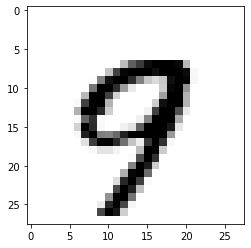

In [36]:
plt.imshow(images[ChoosePic].numpy().squeeze(), cmap='gray_r')

In [37]:
img = images[ChoosePic].view(1, 784)

In [38]:
with torch.no_grad():
    logps = model(img)

In [39]:
ps = torch.exp(logps)

In [40]:
probab = list(ps.numpy()[0])

In [41]:
probab

[1.4380317e-06,
 1.6413332e-10,
 1.975929e-06,
 5.523743e-06,
 1.7171304e-05,
 2.4469909e-08,
 3.5144793e-11,
 0.0033634582,
 3.6504107e-06,
 0.9966067]

In [42]:
print("Predicted Digit =", probab.index(max(probab)))

Predicted Digit = 9


In [43]:
correct_count, all_count = 0, 0
for images, labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1,784)
        with torch.no_grad():
            logps = model(img)
        
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number of Images Tested = 10000

Model Accuracy = 0.9754


In [44]:
torch.save(model, './mnist_model_1.pt')